# Pytorch Lessons

## Import main libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import torch
from torch import nn
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor


## Create a sequential NN

In [37]:
class MyNNTest(nn.Module):

    def __init__(self):
        # call the parent class constructor
        super().__init__()

        # self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

In [38]:
model = MyNNTest().double()

print(model)

MyNNTest(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [39]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [23]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 2]) | Values : tensor([[ 0.3918, -0.4192],
        [-0.0935, -0.6215]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0016, 0.4560], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0012, -0.0155, -0.0234,  ..., -0.0207,  0.0199, -0.0402],
        [ 0.0252,  0.0330, -0.0322,  ...,  0.0248, -0.0226, -0.0202]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values : tensor([ 0.0050, -0.0338], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([1, 512]) | Values : tensor([[ 3.1476e-02, -3.1610e-02,  3.2460e-02, -1.2747e-02,  3.1212e-02,
          3.7826e-03,  3.4373e-02, -3.5654e-02,  4.6551e-03, -9.2084e-04,
         -8.2455e-03, -2.0969e-02,  2.0928e-02,  6.4402e-03, -8.7342e-03,
          4.5322e-03, -4.2088e-02, -4.9246e-03,

In [24]:
model.state_dict()['linear_relu_stack.0.weight']

tensor([[ 0.3918, -0.4192],
        [-0.0935, -0.6215],
        [ 0.4750, -0.5103],
        ...,
        [-0.6251,  0.2925],
        [ 0.2232,  0.3493],
        [-0.3443, -0.4862]])

In [34]:
ep = 0.3 # error term
num = 20000 #num poins

X = np.random.uniform(-4*np.pi,4*np.pi, (num,1))
Y = np.random.uniform(-4*np.pi,4*np.pi, (num,1))

XXX = np.hstack((X,Y))

Z = np.sin(np.sqrt(X**2+Y**2))+ ep*np.random.normal(0,1,(num,1))

In [40]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16654638.51it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 1671729.09it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 7555539.30it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]


Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



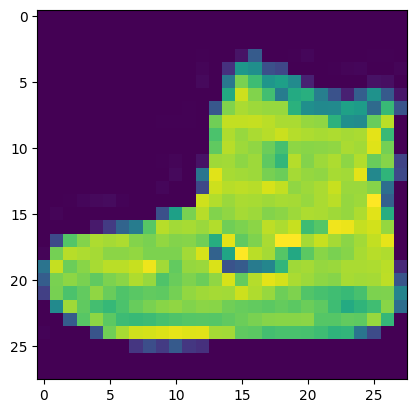

In [49]:
plt.imshow(training_data[0][0].reshape(28,28).numpy())

In [51]:
train_dataloader = DataLoader(training_data, batch_size=32)

In [56]:
for batch, (X, y) in enumerate(train_dataloader):
    print(X.shape, y.shape)
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])
